# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
import gmaps
import json
import requests
from api_keys import api_key
from api_keys import g_key
import random
import pandas as pd
import numpy as np
import json
import matplotlib.pyplot as plt
from scipy.stats import linregress

# Access maps with unique API key
gmaps.configure(api_key=g_key)

## Generate Cities List

In [2]:
# Import cities file as DataFrame
#cities_pd = pd.read_csv("worldcities.csv")
cities_pd = pd.read_csv("cities.csv")

cities_pd.head(100)

,City_ID,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,0,ostrovnoy,2,RU,1558378754,72,68.05,39.51,37.50,7.16
1,1,mahebourg,75,MU,1558378503,74,-20.41,57.70,78.80,11.41
2,2,qaanaaq,25,GL,1558378755,73,77.48,-69.36,22.20,2.37
3,3,zhuhai,0,CN,1558378755,39,40.71,112.04,44.60,4.47
4,4,cape town,20,ZA,1558378755,76,-33.93,18.42,55.99,8.05
...,...,...,...,...,...,...,...,...,...,...
95,95,agirish,100,RU,1558378772,88,61.92,63.02,32.82,9.10
96,96,mataura,58,NZ,1558378772,88,-46.19,168.86,48.00,1.99
97,97,katsuura,90,JP,1558378772,93,33.93,134.50,66.20,5.82
98,98,shalinskoye,66,RU,1558378772,63,55.72,93.76,53.70,7.83


### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
url = "http://api.openweathermap.org/data/2.5/weather?"
#cities = cities_pd["city_ascii"]
#api.openweathermap.org/data/2.5/weather?lat={lat}&lon={lon}&appid={your api key}
cities = cities_pd["City"]
cntry = cities_pd["Country"]

lat = cities_pd["Lat"]
lng = cities_pd["Lng"]

temper = cities_pd["Max Temp"]
hum = cities_pd["Humidity"]
cloud = cities_pd["Cloudiness"]
speed = cities_pd["Wind Speed"]



nor_lat = []
nor_hum = []
nor_temper = []
nor_cloud = []
nor_speed = []

sou_lat = []
sou_hum = []
sou_temper = []
sou_cloud = []
sou_speed = []

units = "metric"
impl = "imperial"
query_url = f"{url}appid={api_key}&units={impl}&q="



### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [4]:
#  Get the indices of cities that have humidity over 100%.

# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".
#by default all humidity are less than 100
for index, row in cities_pd.iterrows():
    try:
        if (row["Lat"] >= 0 ):
            nor_lat.append(row['Lat'])
            nor_temper.append(row['Max Temp'])
            nor_hum.append(row['Humidity'])
            nor_speed.append(row['Wind Speed'])
            nor_cloud.append(row['Cloudiness'])            
        else:
            sou_lat.append(row['Lat'])
            sou_temper.append(row['Max Temp'])
            sou_hum.append(row['Humidity'])
            sou_speed.append(row['Wind Speed'])
            sou_cloud.append(row['Cloudiness'])  
    except:
        pass
    

In [5]:
cities_pd.head(100)

,City_ID,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,0,ostrovnoy,2,RU,1558378754,72,68.05,39.51,37.50,7.16
1,1,mahebourg,75,MU,1558378503,74,-20.41,57.70,78.80,11.41
2,2,qaanaaq,25,GL,1558378755,73,77.48,-69.36,22.20,2.37
3,3,zhuhai,0,CN,1558378755,39,40.71,112.04,44.60,4.47
4,4,cape town,20,ZA,1558378755,76,-33.93,18.42,55.99,8.05
...,...,...,...,...,...,...,...,...,...,...
95,95,agirish,100,RU,1558378772,88,61.92,63.02,32.82,9.10
96,96,mataura,58,NZ,1558378772,88,-46.19,168.86,48.00,1.99
97,97,katsuura,90,JP,1558378772,93,33.93,134.50,66.20,5.82
98,98,shalinskoye,66,RU,1558378772,63,55.72,93.76,53.70,7.83


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [6]:
complete_wea_dict = {
    "lat": lat,
    "lng": lng,
    "temper": temper,
    "hum": hum,
    "cloud": cloud,
    "speed": speed
}
complete_wea_dict_data = pd.DataFrame(complete_wea_dict)
complete_wea_dict_data

,lat,lng,temper,hum,cloud,speed
0,68.05,39.51,37.50,72,2,7.16
1,-20.41,57.70,78.80,74,75,11.41
2,77.48,-69.36,22.20,73,25,2.37
3,40.71,112.04,44.60,39,0,4.47
4,-33.93,18.42,55.99,76,20,8.05
...,...,...,...,...,...,...
543,33.97,36.66,80.60,32,0,8.05
544,24.01,-104.61,84.20,4,5,16.11
545,49.65,0.71,61.00,62,0,8.05
546,51.07,132.56,49.74,93,100,2.68


In [7]:
complete_nor_wea_dict = {
    "nor_lat": nor_lat,
    "nor_hum": nor_hum,
     "nor_temper": nor_temper,
    "nor_cloud": nor_cloud,
    "nor_speed": nor_speed
}
complete_nor_wea_dict_data = pd.DataFrame(complete_nor_wea_dict)
complete_nor_wea_dict_data    


,nor_lat,nor_hum,nor_temper,nor_cloud,nor_speed
0,68.05,72,37.50,2,7.16
1,77.48,73,22.20,25,2.37
2,40.71,39,44.60,0,4.47
3,71.64,88,14.10,95,15.70
4,57.02,70,65.04,6,6.93
...,...,...,...,...,...
375,33.97,32,80.60,0,8.05
376,24.01,4,84.20,5,16.11
377,49.65,62,61.00,0,8.05
378,51.07,93,49.74,100,2.68


In [8]:
complete_sou_wea_dict = {
    "sou_lat": sou_lat,
    "sou_hum": sou_hum,
    "sou_temper": sou_temper,
    "sou_cloud": sou_cloud,
    "sou_speed": sou_speed
}
complete_sou_wea_dict_data = pd.DataFrame(complete_sou_wea_dict)
complete_sou_wea_dict_data    


,sou_lat,sou_hum,sou_temper,sou_cloud,sou_speed
0,-20.41,74,78.80,75,11.41
1,-33.93,76,55.99,20,8.05
2,-9.80,76,81.96,78,16.49
3,-34.58,62,60.01,0,11.41
4,-18.06,23,72.06,0,5.44
...,...,...,...,...,...
163,-40.81,41,58.56,14,10.98
164,-33.01,71,50.00,75,12.75
165,-0.92,82,81.24,100,7.65
166,-0.90,80,78.72,72,3.83


In [9]:
#  Get the indices of cities that have humidity over 100%.
humd_over_more = complete_wea_dict_data.loc[complete_wea_dict_data["hum"] >100]
humd_over_more

,lat,lng,temper,hum,cloud,speed
129,-5.09,-81.11,62.6,290,0,17.22


In [10]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".
complete_wea_dict_data

,lat,lng,temper,hum,cloud,speed
0,68.05,39.51,37.50,72,2,7.16
1,-20.41,57.70,78.80,74,75,11.41
2,77.48,-69.36,22.20,73,25,2.37
3,40.71,112.04,44.60,39,0,4.47
4,-33.93,18.42,55.99,76,20,8.05
...,...,...,...,...,...,...
543,33.97,36.66,80.60,32,0,8.05
544,24.01,-104.61,84.20,4,5,16.11
545,49.65,0.71,61.00,62,0,8.05
546,51.07,132.56,49.74,93,100,2.68


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

C:\ravi\anaconda3\lib\site-packages\matplotlib\collections.py:885: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor


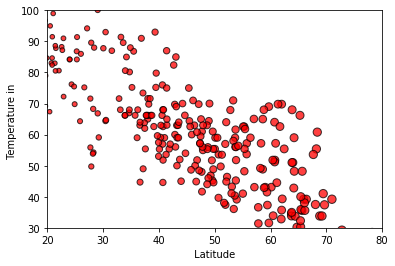

In [11]:
#This is for temperature vs latitude
x_limit = 100
x_axis = lat
data = temper
plt.scatter(x_axis, data, marker="o", facecolors="red", edgecolors="black",
            s=x_axis, alpha=0.75)
plt.ylim(30, 100)
plt.xlim(20,80)
plt.xlabel(" Latitude ")
plt.ylabel(" Temperature in  ")
plt.savefig("../output_img/temp_vs_latitude.png")
plt.show()

## Latitude vs. Humidity Plot

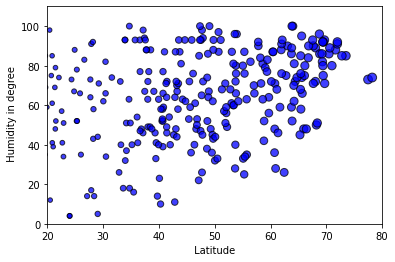

In [12]:
#This is for humidity vs latitude
x_limit = 100

x_axis = lat

data = hum
plt.scatter(x_axis, data, marker="o", facecolors="blue", edgecolors="black",
            s=x_axis, alpha=0.75)
plt.ylim(0, 110)
plt.xlim(20,80)
plt.xlabel(" Latitude ")
plt.ylabel(" Humidity in degree")
plt.savefig("../output_img/humidity_vs_latitude.png")
plt.show()

## Latitude vs. Cloudiness Plot

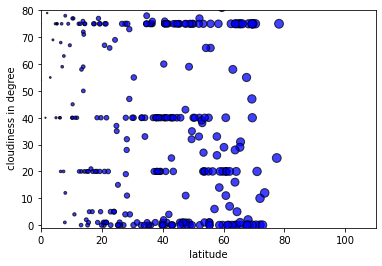

In [13]:
#This is for cloudiness vs latitude
x_limit = 100

x_axis = lat

data = cloud
plt.scatter(x_axis, data, marker="o", facecolors="blue", edgecolors="black",
            s=x_axis, alpha=0.75)
plt.ylim(-1, 80)
plt.xlim(0,110)
plt.xlabel(" latitude ")
plt.ylabel(" cloudiness in degree")
plt.savefig("../output_img/cloudiness_vs_latitude.png")
plt.show()

## Latitude vs. Wind Speed Plot

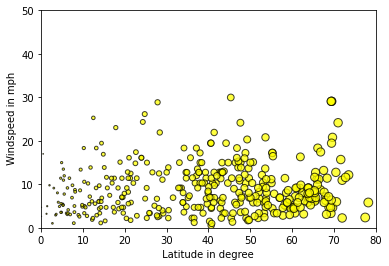

In [14]:
#This is for windspeed(mph) vs latitude
x_limit = 100

x_axis = lat

data = speed
plt.scatter(x_axis, data, marker="o", facecolors="yellow", edgecolors="black",
            s=x_axis, alpha=0.75)
plt.ylim(0, 50)
plt.xlim(0,80)
plt.xlabel(" Latitude in degree ")
plt.ylabel(" Windspeed in mph")
plt.savefig("../output_img/windspeed_vs_latitude.png")
plt.show()

## Linear Regression

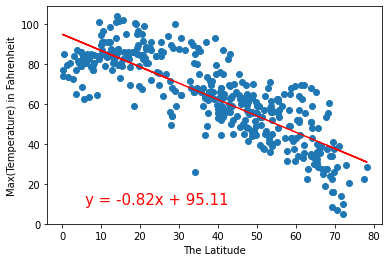

 The linear regression is y = -0.82x + 95.11


In [15]:
weather_dict = {
    "lat": nor_lat,
    "temp": nor_temper
}
weather_data = pd.DataFrame(weather_dict)
max_temp = weather_data["temp"]
lat_data = weather_data["lat"]




x_values = lat_data
y_values = max_temp
(wea_slope, wea_intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
wea_regress_values = x_values* wea_slope + wea_intercept
line_eq = "y = " + str(round(wea_slope,2)) + "x + " + str(round(wea_intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,wea_regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('The Latitude')
plt.ylabel('Max(Temperature) in Fahrenheit')
plt.savefig("../output_img/northern_max_temp_vs_latitude.png")
plt.show()
print(f' The linear regression is {line_eq}')


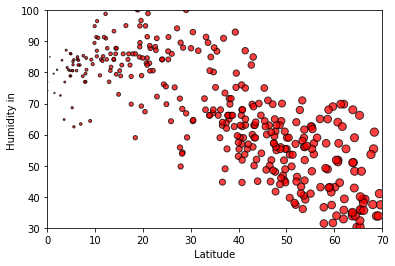

In [16]:
#This is for temperature vs latitude
x_limit = 100
x_axis = nor_lat
data = nor_temper
plt.scatter(x_axis, data, marker="o", facecolors="red", edgecolors="black",
            s=x_axis, alpha=0.75)
plt.ylim(30, 100)
plt.xlim(0,70)
plt.xlabel(" Latitude ")
plt.ylabel(" Humidity in  ")
plt.savefig("../output_img/northern_temp_vs_latitude.png")
plt.show()

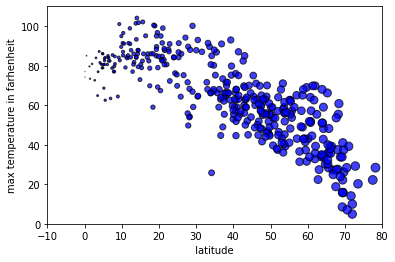

In [17]:
# max temperature vs latitude
x_limit = 100

x_axis = lat_data

data = max_temp
plt.scatter(x_axis, data, marker="o", facecolors="blue", edgecolors="black",
            s=x_axis, alpha=0.75)
plt.ylim(0, 110)
plt.xlim(-10,80)
plt.xlabel(" latitude ")
plt.ylabel("max temperature in farhenheit")
plt.show()

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

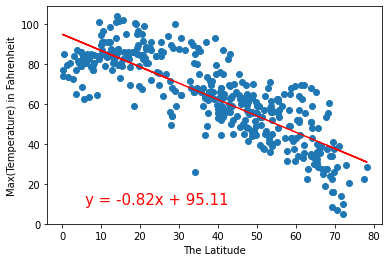

The r-squared is: 0.6644951847801386
 The linear regression is y = -0.82x + 95.11


In [26]:
#Max temperature vs Latitude, the linear regression is provided as print statement in Northen hemisphere
weather_dict = {
    "lat": nor_lat,
    "temp": nor_temper
}
weather_data = pd.DataFrame(weather_dict)
max_temp = weather_data["temp"]
lat_data = weather_data["lat"]
x_values = lat_data
y_values = max_temp
(wea_slope, wea_intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
wea_regress_values = x_values* wea_slope + wea_intercept
line_eq = "y = " + str(round(wea_slope,2)) + "x + " + str(round(wea_intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,wea_regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('The Latitude')
plt.ylabel('Max(Temperature) in Fahrenheit')
plt.savefig("../output_img/northern_max_temp_vs_latitude.png")
plt.show()
print(f"The r-squared is: {rvalue**2}")
print(f' The linear regression is {line_eq}')


####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

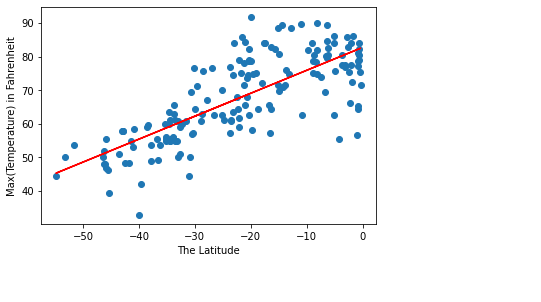

The r-squared is: 0.5780003690343855
 The linear regression is y = 0.68x + 82.78


In [27]:
#Max temperature vs Latitude, the linear regression is provided as print statement for southern hemisphere
weather_dict = {
    "lat": sou_lat,
    "temp": sou_temper
}
weather_data = pd.DataFrame(weather_dict)
max_temp = weather_data["temp"]
lat_data = weather_data["lat"]
x_values = lat_data
y_values = max_temp

(wea_slope, wea_intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
wea_regress_values = x_values* wea_slope + wea_intercept
line_eq = "y = " + str(round(wea_slope,2)) + "x + " + str(round(wea_intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,wea_regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('The Latitude')
plt.ylabel('Max(Temperature) in Fahrenheit')
plt.savefig("../output_img/southern_max_temp_vs_latitude.png")
plt.show()
print(f"The r-squared is: {rvalue**2}")
print(f' The linear regression is {line_eq}')

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

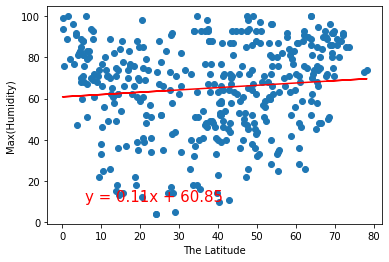

The r-squared is: 0.010729512501511098
 The linear regression is y = 0.11x + 60.85


In [28]:
#Max humidty vs Latitude, the linear regression is provided as print statement in Northen hemisphere
weather_dict = {
    "lat": nor_lat,
    "temp": nor_hum
}
weather_data = pd.DataFrame(weather_dict)
max_temp = weather_data["temp"]
lat_data = weather_data["lat"]
x_values = lat_data
y_values = max_temp
(wea_slope, wea_intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
wea_regress_values = x_values* wea_slope + wea_intercept
line_eq = "y = " + str(round(wea_slope,2)) + "x + " + str(round(wea_intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,wea_regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('The Latitude')
plt.ylabel('Max(Humidity) ')
plt.savefig("../output_img/northern_max_humidity_vs_latitude.png")
plt.show()
print(f"The r-squared is: {rvalue**2}")
print(f' The linear regression is {line_eq}')

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

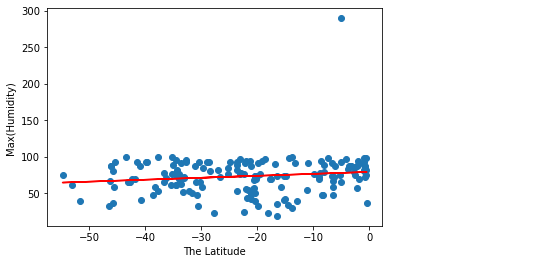

The r-squared is: 0.021578062952091134
 The linear regression is y = 0.27x + 79.32


In [29]:
#Max humidty vs Latitude, the linear regression is provided as print statement in Southern hemisphere
weather_dict = {
    "lat": sou_lat,
    "temp": sou_hum
}
weather_data = pd.DataFrame(weather_dict)
max_temp = weather_data["temp"]
lat_data = weather_data["lat"]
x_values = lat_data
y_values = max_temp
(wea_slope, wea_intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
wea_regress_values = x_values* wea_slope + wea_intercept
line_eq = "y = " + str(round(wea_slope,2)) + "x + " + str(round(wea_intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,wea_regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('The Latitude')
plt.ylabel('Max(Humidity) ')
plt.savefig("../output_img/southern_max_humidity_vs_latitude.png")
plt.show()
print(f"The r-squared is: {rvalue**2}")
print(f' The linear regression is {line_eq}')

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

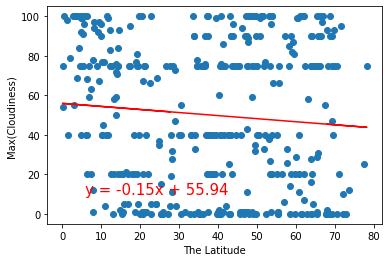

The r-squared is: 0.007627485925231671
 The linear regression is y = -0.15x + 55.94


In [30]:
#Max Cloudiness vs Latitude, the linear regression is provided as print statement in Northen hemisphere
weather_dict = {
    "lat": nor_lat,
    "temp": nor_cloud
}
weather_data = pd.DataFrame(weather_dict)
max_temp = weather_data["temp"]
lat_data = weather_data["lat"]
x_values = lat_data
y_values = max_temp
(wea_slope, wea_intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
wea_regress_values = x_values* wea_slope + wea_intercept
line_eq = "y = " + str(round(wea_slope,2)) + "x + " + str(round(wea_intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,wea_regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('The Latitude')
plt.ylabel('Max(Cloudiness) ')
plt.savefig("../output_img/northern_max_cloudiness_vs_latitude.png")
plt.show()
print(f"The r-squared is: {rvalue**2}")
print(f' The linear regression is {line_eq}')

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

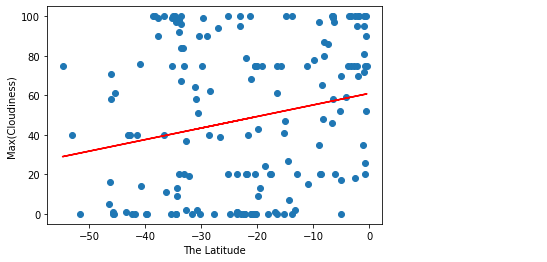

The r-squared is: 0.047879684291709905
 The linear regression is y = 0.58x + 60.96


In [31]:
#Max Cloudiness vs Latitude, the linear regression is provided as print statement in Southern hemisphere
weather_dict = {
    "lat": sou_lat,
    "temp": sou_cloud
}
weather_data = pd.DataFrame(weather_dict)
max_temp = weather_data["temp"]
lat_data = weather_data["lat"]
x_values = lat_data
y_values = max_temp
(wea_slope, wea_intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
wea_regress_values = x_values* wea_slope + wea_intercept
line_eq = "y = " + str(round(wea_slope,2)) + "x + " + str(round(wea_intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,wea_regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('The Latitude')
plt.ylabel('Max(Cloudiness) ')
plt.savefig("../output_img/southern_max_cloudiness_vs_latitude.png")
plt.show()
print(f"The r-squared is: {rvalue**2}")
print(f' The linear regression is {line_eq}')

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

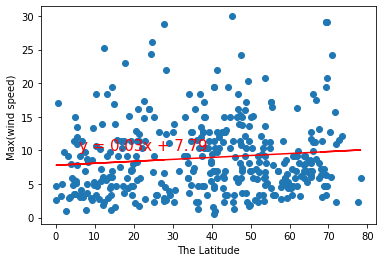

The r-squared is: 0.011478610492563561
 The linear regression is y = 0.03x + 7.79


In [32]:
#Max wind speed vs Latitude, the linear regression is provided as print statement in Northen hemisphere
weather_dict = {
    "lat": nor_lat,
    "temp": nor_speed
}
weather_data = pd.DataFrame(weather_dict)
max_temp = weather_data["temp"]
lat_data = weather_data["lat"]
x_values = lat_data
y_values = max_temp
(wea_slope, wea_intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
wea_regress_values = x_values* wea_slope + wea_intercept
line_eq = "y = " + str(round(wea_slope,2)) + "x + " + str(round(wea_intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,wea_regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('The Latitude')
plt.ylabel('Max(wind speed) ')
plt.savefig("../output_img/northern_max_windspeed_vs_latitude.png")
plt.show()
print(f"The r-squared is: {rvalue**2}")
print(f' The linear regression is {line_eq}')

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

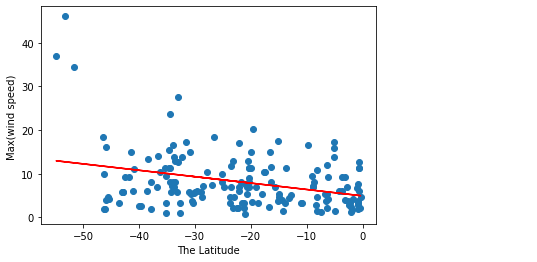

The r-squared is: 0.10399533504138529
 The linear regression is y = -0.15x + 4.91


In [33]:
#Max wind speed vs Latitude, the linear regression is provided as print statement in Southern hemisphere
weather_dict = {
    "lat": sou_lat,
    "temp": sou_speed
}
weather_data = pd.DataFrame(weather_dict)
max_temp = weather_data["temp"]
lat_data = weather_data["lat"]
x_values = lat_data
y_values = max_temp
(wea_slope, wea_intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
wea_regress_values = x_values* wea_slope + wea_intercept
line_eq = "y = " + str(round(wea_slope,2)) + "x + " + str(round(wea_intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,wea_regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('The Latitude')
plt.ylabel('Max(wind speed) ')
plt.savefig("../output_img/southern_max_windspeed_vs_latitude.png")
plt.show()
print(f"The r-squared is: {rvalue**2}")
print(f' The linear regression is {line_eq}')